In [9]:
import tensorflow as tf
import numpy as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from datetime import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

In [4]:
%load_ext tensorboard

In [49]:
train_path_to_file = tf.keras.utils.get_file(
    'horse-or-human.zip',
    cache_subdir='horse-or-human',
    origin='http://aimaksen.bslience.cn/horse-or-human.zip',
    extract=True
)

149585920/149574867 [==============================] - 11s 0us/step


In [43]:
val_path_to_file = tf.keras.utils.get_file(
    'validation-horse-or-human.zip',
    cache_subdir='validation-horse-or-human',
    origin='http://aimaksen.bslience.cn/validation-horse-or-human.zip',
    extract=True
)

11493376/11480187 [==============================] - 0s 0us/step


In [10]:
horse_dir = Path(train_path_to_file).parent / "horses"
human_dir = Path(train_path_to_file).parent / "humans"

In [44]:
horse_dir

PosixPath('/home/stu_18510310195/.keras/horse-or-human/horses')

In [48]:
# os.listdir('/home/stu_18510310195/.keras')


['keras.json', 'datasets', 'validation-horse-or-human']

In [47]:
# !rm -rf /home/stu_18510310195/.keras/horse-or-human

In [11]:
horse_names = os.listdir(horse_dir)
human_names = os.listdir(human_dir)
horse_names

['horse06-8.png',
 'horse20-9.png',
 'horse5-405.png',
 'horse47-6.png',
 'horse6-198.png',
 'horse38-2.png',
 'horse31-4.png',
 'horse41-4.png',
 'horse12-5.png',
 'horse42-0.png',
 'horse23-6.png',
 'horse32-4.png',
 'horse08-2.png',
 'horse04-7.png',
 'horse10-1.png',
 'horse2-596.png',
 'horse1-568.png',
 'horse50-4.png',
 'horse23-9.png',
 'horse41-2.png',
 'horse40-9.png',
 'horse01-8.png',
 'horse46-7.png',
 'horse20-5.png',
 'horse16-1.png',
 'horse23-2.png',
 'horse11-3.png',
 'horse47-3.png',
 'horse1-554.png',
 'horse4-548.png',
 'horse07-4.png',
 'horse20-6.png',
 'horse47-2.png',
 'horse37-3.png',
 'horse22-6.png',
 'horse12-2.png',
 'horse24-8.png',
 'horse49-8.png',
 'horse21-8.png',
 'horse32-9.png',
 'horse5-519.png',
 'horse03-2.png',
 'horse21-4.png',
 'horse1-264.png',
 'horse04-6.png',
 'horse41-9.png',
 'horse33-7.png',
 'horse26-2.png',
 'horse06-9.png',
 'horse35-8.png',
 'horse16-3.png',
 'horse46-2.png',
 'horse17-0.png',
 'horse33-6.png',
 'horse35-9.png',
 '

In [12]:
%matplotlib inline

In [19]:
horse_list = [os.path.join(horse_dir, name) for name in horse_names[0:8]]
human_list = [os.path.join(human_dir, name) for name in human_names[0:8]]

In [31]:
nrow = 4
ncow = 4
fig = plt.gcf()
fig.set_size_inches(nrow*4, ncow*4)

<Figure size 1152x1152 with 0 Axes>

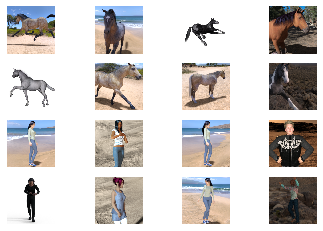

In [33]:
for i, imgpath in enumerate(horse_list + human_list):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')
    img = mpimg.imread(imgpath)
    plt.imshow(img)

In [36]:
data_gen = ImageDataGenerator(rescale=1/255)


In [50]:
train_generator = data_gen.flow_from_directory(
    Path(train_path_to_file).parent,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)
# data_gen.flow_from_directory?

Found 1027 images belonging to 2 classes.


In [51]:
val_generator = data_gen.flow_from_directory(
    Path(val_path_to_file).parent,
    target_size=(300,300),
    batch_size=16,
    class_mode='binary'
)
# data_gen.flow_from_directory?

Found 256 images belonging to 2 classes.


In [54]:
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [56]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3, 3), activation='relu',input_shape=(300,300,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [57]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [60]:
logdir = f"logs/fit/{datetime.now().strftime('%Y%m%d_%H%M%S')}"
logdir

'logs/fit/20211213_052434'

In [61]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [62]:
class MyCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.9:
            print("val accuracy is greater than 0.9, stop training")
            self.model.stop_training = True

In [63]:
mycallback = MyCallBack()

In [65]:
model.fit(train_generator, epochs=20, callbacks=[tensorboard_callback, mycallback], validation_data=val_generator)

Epoch 1/20
9/9 [==============================] - 23s 2s/step - loss: 0.8141 - accuracy: 0.5248 - val_loss: 0.6128 - val_accuracy: 0.5781
Epoch 2/20
9/9 [==============================] - 22s 2s/step - loss: 0.7709 - accuracy: 0.6553 - val_loss: 0.4856 - val_accuracy: 0.7812
Epoch 3/20
9/9 [==============================] - 20s 3s/step - loss: 0.7594 - accuracy: 0.7575 - val_loss: 0.6572 - val_accuracy: 0.7266
Epoch 4/20
9/9 [==============================] - 20s 2s/step - loss: 0.6721 - accuracy: 0.8247 - val_loss: 0.6925 - val_accuracy: 0.7812
Epoch 5/20
9/9 [==============================] - 21s 2s/step - loss: 0.1914 - accuracy: 0.9289 - val_loss: 1.8920 - val_accuracy: 0.7812
Epoch 6/20
9/9 [==============================] - 21s 2s/step - loss: 0.1264 - accuracy: 0.9552 - val_loss: 1.8473 - val_accuracy: 0.7773
Epoch 7/20
9/9 [==============================] - 20s 2s/step - loss: 0.0442 - accuracy: 0.9834 - val_loss: 1.9748 - val_accuracy: 0.7930
Epoch 8/20
9/9 [==================

In [66]:
!tensorboard --logdir logs --port=6307 --bind_all

2021-12-13 05:38:14.196939: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-13 05:38:14.196995: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-13 05:38:15.925135: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-13 05:38:15.925195: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-13 05:38:15.925221: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cd0542b8a560): /proc/driver/nvidia/version does not exist

NOTE: Using experimental fast data loading logic. To disable, p

In [73]:
horse_test_path = Path(horse_dir)/horse_names[0]
human_test_path = Path(human_dir)/human_names[0]

In [70]:
import tensorflow.keras.preprocessing.image as image

In [74]:
horse_img = image.load_img(horse_test_path)
human_img = image.load_img(human_test_path)

In [83]:
horse_array = image.img_to_array(horse_img) / 255.0
human_array = image.img_to_array(human_img) / 255.0

In [84]:
horse_array = np.expand_dims(horse_array, 0)
human_array = np.expand_dims(human_array, 0)

In [85]:
horse_array.shape, human_array.shape

((1, 300, 300, 3), (1, 300, 300, 3))

In [89]:
model.predict(horse_array)


array([[4.5632223e-06]], dtype=float32)

In [90]:
model.predict(human_array)

array([[0.9775314]], dtype=float32)